## MNIST Classification with a simple ANN

In [1]:
import tensorflow as tf
tf.__version__

'1.3.0'

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
sess = tf.InteractiveSession()

In [4]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

In [5]:
W = tf.Variable(tf.zeros([784, 10], tf.float32))
b = tf.Variable(tf.zeros([10], tf.float32))

In [6]:
sess.run(tf.initialize_all_variables())

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [7]:
tf.matmul(x, W) + b

<tf.Tensor 'add:0' shape=(?, 10) dtype=float32>

In [8]:
y = tf.nn.softmax(tf.matmul(x, W) + b)

In [9]:
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

In [10]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [11]:
for i in range(10000):
    batch = mnist.train.next_batch(50)
    train_step.run(feed_dict={x: batch[0], y_: batch[1]})

In [12]:
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
acc = accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels}) * 100
print("The final accuracy of the simple ANN model is: {} % " .format(acc))

The final accuracy of the simple ANN model is: 91.9500172138 % 


In [13]:
sess.close()

## MNIST Classification with a CNN

In [14]:
sess = tf.InteractiveSession()

In [15]:
width = 28
height = 28
flat = width * height
class_output = 10

In [16]:
x = tf.placeholder(tf.float32, shape=[None, flat])
y_ = tf.placeholder(tf.float32, shape=[None, class_output])

In [17]:
x_image = tf.reshape(x, [-1, 28, 28, 1])
x_image

<tf.Tensor 'Reshape:0' shape=(?, 28, 28, 1) dtype=float32>

#### Layer 1 (Conv)

In [18]:
W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev=0.1))
b_conv1 = tf.Variable(tf.constant(0.1, shape=[32]))

In [19]:
convolve1 = tf.nn.conv2d(x_image, W_conv1, strides=[1,1,1,1], padding='SAME') + b_conv1

In [20]:
h_conv1 = tf.nn.relu(convolve1)

In [21]:
conv1 = tf.nn.max_pool(h_conv1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
conv1

<tf.Tensor 'MaxPool:0' shape=(?, 14, 14, 32) dtype=float32>

#### Layer 2 (Conv)

In [22]:
W_conv2 = tf.Variable(tf.truncated_normal([5,5,32,64], stddev=0.1))
b_conv2 = tf.Variable(tf.constant(0.1, shape=[64]))

convolve2 = tf.nn.conv2d(conv1, W_conv2, strides=[1,1,1,1], padding='SAME')

h_conv2 = tf.nn.relu(convolve2)

conv2 = tf.nn.max_pool(h_conv2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
conv2

<tf.Tensor 'MaxPool_1:0' shape=(?, 7, 7, 64) dtype=float32>

#### Layer 3 (FC)

In [23]:
layer2_matrix = tf.reshape(conv2, [-1, 7*7*64])

In [24]:
W_fc1 = tf.Variable(tf.truncated_normal([7*7*64, 1024], stddev = 0.1))
b_fc1 = tf.Variable(tf.constant(0.1, shape=[1024]))

fcl = tf.matmul(layer2_matrix, W_fc1) + b_fc1

h_fc1 = tf.nn.relu(fcl)
h_fc1

<tf.Tensor 'Relu_2:0' shape=(?, 1024) dtype=float32>

#### Dropout

In [25]:
keep_prob = tf.placeholder(tf.float32)
layer_drop = tf.nn.dropout(h_fc1, keep_prob)
layer_drop

<tf.Tensor 'dropout/mul:0' shape=(?, 1024) dtype=float32>

#### Softmax Layer

In [26]:
W_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev=0.1))
b_fc2 = tf.Variable(tf.constant(0.1, shape=[10]))

fc = tf.matmul(layer_drop, W_fc2) + b_fc2

y_CNN = tf.nn.softmax(fc)
y_CNN

<tf.Tensor 'Softmax_1:0' shape=(?, 10) dtype=float32>

In [27]:
# Loss Function
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(y_CNN), reduction_indices=[1]))

# Optimizer
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_CNN, 1), tf.argmax(y_, 1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

sess.run(tf.global_variables_initializer())

In [28]:
for i in range(20000):
    batch = mnist.train.next_batch(50)
    if i % 100 == 0:
        train_accuracy = accuracy.eval(feed_dict={x: batch[0], y_: batch[1], keep_prob: 1.0})
        print 'Step: %d  -  Accuracy: %g' % (i, train_accuracy)
    train_step.run(feed_dict={x:batch[0], y_:batch[1], keep_prob:0.5})

Step: 0  -  Accuracy: 0.2
Step: 100  -  Accuracy: 0.9
Step: 200  -  Accuracy: 0.9
Step: 300  -  Accuracy: 0.94
Step: 400  -  Accuracy: 0.98
Step: 500  -  Accuracy: 0.92
Step: 600  -  Accuracy: 0.98
Step: 700  -  Accuracy: 0.98
Step: 800  -  Accuracy: 0.96
Step: 900  -  Accuracy: 0.94
Step: 1000  -  Accuracy: 0.98
Step: 1100  -  Accuracy: 0.96
Step: 1200  -  Accuracy: 0.98
Step: 1300  -  Accuracy: 0.98
Step: 1400  -  Accuracy: 0.98
Step: 1500  -  Accuracy: 0.96
Step: 1600  -  Accuracy: 1
Step: 1700  -  Accuracy: 1
Step: 1800  -  Accuracy: 0.92
Step: 1900  -  Accuracy: 0.94
Step: 2000  -  Accuracy: 0.98
Step: 2100  -  Accuracy: 0.96
Step: 2200  -  Accuracy: 1
Step: 2300  -  Accuracy: 0.98
Step: 2400  -  Accuracy: 1
Step: 2500  -  Accuracy: 1
Step: 2600  -  Accuracy: 1
Step: 2700  -  Accuracy: 1
Step: 2800  -  Accuracy: 0.96
Step: 2900  -  Accuracy: 0.98
Step: 3000  -  Accuracy: 1
Step: 3100  -  Accuracy: 1
Step: 3200  -  Accuracy: 1
Step: 3300  -  Accuracy: 0.96
Step: 3400  -  Accuracy: 

In [31]:
print 'Test Accuracy: %g' %accuracy.eval(feed_dict={x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0})

Test Accuracy: 0.9912


### Visualization

In [32]:
kernels = sess.run(tf.reshape(tf.transpose(W_conv1, perm=[2,3,0,1]),[32,-1]))

In [33]:
!wget --output-document utils1.py http://deeplearning.net/tutorial/code/utils.py

--2017-11-02 23:10:28--  http://deeplearning.net/tutorial/code/utils.py
Resolving deeplearning.net (deeplearning.net)... 132.204.26.28
Connecting to deeplearning.net (deeplearning.net)|132.204.26.28|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5097 (5.0K) [text/plain]
Saving to: ‘utils1.py’

utils1.py           100%[===================>]   4.98K  --.-KB/s    in 0s      

2017-11-02 23:10:30 (376 MB/s) - ‘utils1.py’ saved [5097/5097]



In [39]:
from utils1 import tile_raster_images
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import numpy as np

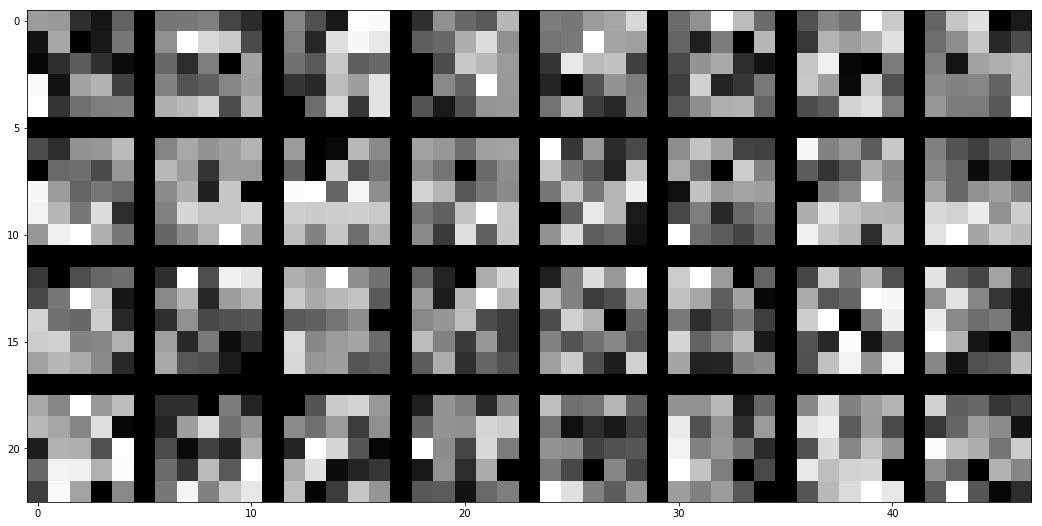

In [37]:
image = Image.fromarray(tile_raster_images(kernels, img_shape=(5, 5), tile_shape=(4, 8), tile_spacing=(1, 1)))
plt.rcParams['figure.figsize'] = (18.0, 18.0)
imgplot = plt.imshow(image)
imgplot.set_cmap('gray')

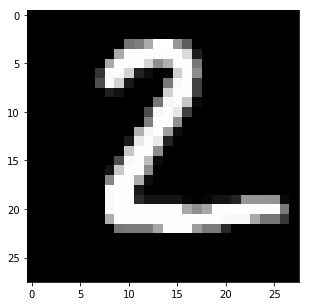

In [40]:
plt.rcParams['figure.figsize'] = (5.0, 5.0)
sampleimage = mnist.test.images[1]
plt.imshow(np.reshape(sampleimage,[28,28]), cmap="gray")

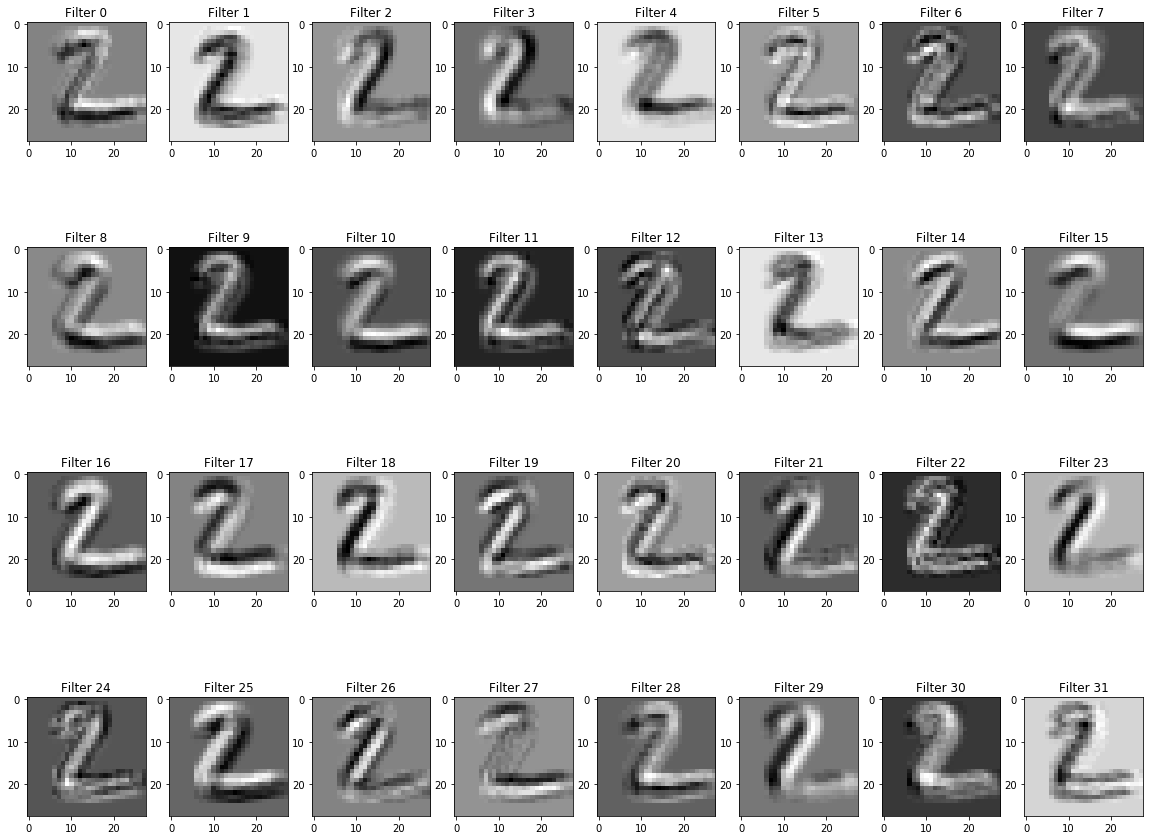

In [41]:
ActivatedUnits = sess.run(convolve1, feed_dict={x: np.reshape(sampleimage, [1,784],order='F'), keep_prob:1.0})
filters = ActivatedUnits.shape[3]
plt.figure(1, figsize=(20,20))
n_columns = 8
n_rows = np.math.ceil(filters / n_columns) + 1
for i in range(filters):
    plt.subplot(n_rows, n_columns, i+1)
    plt.title('Filter ' + str(i))
    plt.imshow(ActivatedUnits[0,:,:,i], interpolation="nearest", cmap="gray")

In [42]:
sess.close()